# Data project

In [1]:
#Installing the DST API wrapper

%pip install git+https://github.com/alemartinello/dstapi

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/68/8wr6rq4s2xz553yhsj6v4m4w0000gn/T/pip-req-build-_imb7zdj
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/68/8wr6rq4s2xz553yhsj6v4m4w0000gn/T/pip-req-build-_imb7zdj
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
  Created wheel for dstapi: filename=dstapi-0.2-py3-none-any.whl size=4128 sha256=5c3799ac1df63e16d1846860665d1e802f618805bb456f7d98d8749b667dc13a
  Stored in directory: /private/var/folders/68/8wr6rq4s2xz553yhsj6v4m4w0000gn/T/pip-ephem-wheel-cache-fnbjz83s/wheels/cf/02/c1/19c2d47a3995ed128565b5594e94b031247543f14ff788df65
Successfully built dstapi
  Attempting uninstall: dstapi
    Found existing installation: dstapi 0.1
    Uninstalling dstapi-0.1:
      Successfully uninstalled dstapi-0.1
Note: you may need to restart the kernel to use upda

In [2]:
# Istalling a wrapper for multiple APIs with a pandas interface
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


Imports and set magics:

In [3]:
import numpy as np
import pandas as pd
import datetime
import ipywidgets as widgets
from scipy.stats import norm

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


# Read and clean data

We use data about the population's highest completed education. The data is diided by age, area of ​​residence, origin, highest completed education and gender

In [4]:
# Importing the data from DST 
ind = DstApi('HFUDD11') 

In [5]:
# Printing a overview of the data
ind_tabel = ind.tablesummary(language='en')
display(ind_tabel)

Table HFUDD11: Educational attainment (15-69 years) by region, ancestry, highest education completed, age, sex and time
Last update: 2023-03-30T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BOPOMR,105,000,All Denmark,851,Aalborg,False
1,HERKOMST,4,TOT,Total,3,Descendant,False
2,HFUDD,93,TOT,Total,H9099,H9099 Not stated,False
3,ALDER,12,TOT,"Age, total",65-69,65-69 years,False
4,KØN,3,TOT,Total,K,Women,False
5,Tid,15,2008,2008,2022,2022,True


In [6]:
# The available values for a each variable: 
for variable in ind_tabel['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))


BOPOMR:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,101,Copenhagen
3,147,Frederiksberg
4,155,Dragør
...,...,...
100,773,Morsø
101,840,Rebild
102,787,Thisted
103,820,Vesthimmerlands


HERKOMST:


,id,text
0,TOT,Total
1,5,Persons of Danish origin
2,4,Immigrants
3,3,Descendant


HFUDD:


,id,text
0,TOT,Total
1,H10,H10 Primary education
2,H1001,H1001 No education
3,H1010,H1010 Primary school through to 6th grade
4,H1020,H1020 Primary school 7th-9th grade
...,...,...
88,H8080,H8080 PhD programmes
89,H8090,"H8090 Health science, PhD"
90,H8097,"H8097 Higher education not specified, PhD"
91,H90,H90 Not stated


ALDER:


,id,text
0,TOT,"Age, total"
1,15-19,15-19 years
2,20-24,20-24 years
3,25-29,25-29 years
4,30-34,30-34 years
5,35-39,35-39 years
6,40-44,40-44 years
7,45-49,45-49 years
8,50-54,50-54 years
9,55-59,55-59 years


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


Tid:


,id,text
0,2008,2008
1,2009,2009
2,2010,2010
3,2011,2011
4,2012,2012
5,2013,2013
6,2014,2014
7,2015,2015
8,2016,2016
9,2017,2017


In [7]:
# Selecting the data we need
params_ind = {'table': 'hfudd11',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BOPOMR', 'values': ['000']},
  {'code': 'HERKOMST', 'values': ['TOT']},
  {'code': 'HFUDD', 'values': ['H40','H50', 'H70']},
  {'code': 'ALDER', 'values': ['35-39']},
  {'code': 'KØN', 'values': ['M','K']},
  {'code': 'Tid', 'values': ['>2017<=2021']}]}

In [8]:
ind_tabel = ind.get_data(params=params_ind)
ind_tabel.head(10)

,BOPOMR,HERKOMST,HFUDD,ALDER,KØN,TID,INDHOLD
0,All Denmark,Total,H40 Short cycle higher education,35-39 years,Women,2018,9573
1,All Denmark,Total,H40 Short cycle higher education,35-39 years,Men,2018,11546
2,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Women,2018,41903
3,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Men,2018,21943
4,All Denmark,Total,H70 Masters programs,35-39 years,Women,2018,31463
5,All Denmark,Total,H70 Masters programs,35-39 years,Men,2018,27214
6,All Denmark,Total,H40 Short cycle higher education,35-39 years,Women,2019,9281
7,All Denmark,Total,H40 Short cycle higher education,35-39 years,Men,2019,11101
8,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Women,2019,41552
9,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Men,2019,22614


In [9]:
#Change Columnames 
ind_tabel.rename(columns={'BOPOMR':'AREA'}, inplace=True)
ind_tabel.rename(columns={'HERKOMST':'ETHNICITY'}, inplace=True)
ind_tabel.rename(columns={'HFUDD':'EDUCATION LEVEL'}, inplace=True)
ind_tabel.rename(columns={'ALDER':'AGE'}, inplace=True)
ind_tabel.rename(columns={'KØN':'SEX'}, inplace=True)
ind_tabel.rename(columns={'TID':'YEAR'}, inplace=True)
ind_tabel.rename(columns={'INDHOLD':'EDUCATED'}, inplace=True)
ind_tabel.head(10)

,AREA,ETHNICITY,EDUCATION LEVEL,AGE,SEX,YEAR,EDUCATED
0,All Denmark,Total,H40 Short cycle higher education,35-39 years,Women,2018,9573
1,All Denmark,Total,H40 Short cycle higher education,35-39 years,Men,2018,11546
2,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Women,2018,41903
3,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Men,2018,21943
4,All Denmark,Total,H70 Masters programs,35-39 years,Women,2018,31463
5,All Denmark,Total,H70 Masters programs,35-39 years,Men,2018,27214
6,All Denmark,Total,H40 Short cycle higher education,35-39 years,Women,2019,9281
7,All Denmark,Total,H40 Short cycle higher education,35-39 years,Men,2019,11101
8,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Women,2019,41552
9,All Denmark,Total,H50 Vocational bachelors educations,35-39 years,Men,2019,22614


In [10]:
#Choosing specific variables 
ind_tabel2 = ind_tabel.drop(columns=  ["AREA", "ETHNICITY", "AGE"])
ind_tabel2


,EDUCATION LEVEL,SEX,YEAR,EDUCATED
0,H40 Short cycle higher education,Women,2018,9573
1,H40 Short cycle higher education,Men,2018,11546
2,H50 Vocational bachelors educations,Women,2018,41903
3,H50 Vocational bachelors educations,Men,2018,21943
4,H70 Masters programs,Women,2018,31463
5,H70 Masters programs,Men,2018,27214
6,H40 Short cycle higher education,Women,2019,9281
7,H40 Short cycle higher education,Men,2019,11101
8,H50 Vocational bachelors educations,Women,2019,41552
9,H50 Vocational bachelors educations,Men,2019,22614


In [11]:
ind_tabel2_men = ind_tabel2[ind_tabel2["SEX"] == "Men"]
ind_tabel2_men

ind_tabel2_women = ind_tabel2[ind_tabel2["SEX"] == "Women"]
ind_tabel2_women

,EDUCATION LEVEL,SEX,YEAR,EDUCATED
0,H40 Short cycle higher education,Women,2018,9573
2,H50 Vocational bachelors educations,Women,2018,41903
4,H70 Masters programs,Women,2018,31463
6,H40 Short cycle higher education,Women,2019,9281
8,H50 Vocational bachelors educations,Women,2019,41552
10,H70 Masters programs,Women,2019,32964
12,H40 Short cycle higher education,Women,2020,9129
14,H50 Vocational bachelors educations,Women,2020,41729
16,H70 Masters programs,Women,2020,34186
18,H40 Short cycle higher education,Women,2021,9148


In [12]:
#importing dataset 2
unemp = DstApi('KAS209')
# Printing a overview of the data
tabsum_unemp = unemp.tablesummary(language='en')
display(tabsum_unemp)
# The available values for a each variable: 
for variable in tabsum_unemp['variable name']:
    print(variable+':')
    display(unemp.variable_levels(variable, language='en'))

Table KAS209: Population by region, education, socioeconomic status, age, sex, period and time
Last update: 2023-03-03T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,116,000,All Denmark,851,Aalborg,False
1,UDDANNELSE,11,TOT,Total,H90,H90 Not stated,False
2,SOCIO,34,TOT,Total,175,Others outside the labour force,False
3,ALDER,13,-15,Under 16 years,67-,67 years and over,False
4,KØN,3,TOT,Total,K,Women,False
5,PERIODE,5,1,Whole year,K4,4. quarter,False
6,Tid,5,2017,2017,2021,2021,True


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
111,773,Morsø
112,840,Rebild
113,787,Thisted
114,820,Vesthimmerlands


UDDANNELSE:


,id,text
0,TOT,Total
1,H10,H10 Primary education
2,H20,H20 Upper secondary education
3,H30,H30 Vocational Education and Training (VET)
4,H35,H35 Qualifying educational programs
5,H40,H40 Short cycle higher education
6,H50,H50 Vocational bachelors educations
7,H60,H60 Bachelors programs
8,H70,H70 Masters programs
9,H80,H80 PhD programs


SOCIO:


,id,text
0,TOT,Total
1,05,Self-employed
2,10,Assisting spouses
3,15,"Employees, managers"
4,20,Employees - upper level
5,25,Employees - medium level
6,30,Employees - basic level
7,35,Other employees
8,40,"Employees, not specified"
9,50,Unemployed


ALDER:


,id,text
0,-15,Under 16 years
1,16-19,16-19 years
2,20-24,20-24 years
3,25-29,25-29 years
4,30-34,30-34 years
5,35-39,35-39 years
6,40-44,40-44 years
7,45-49,45-49 years
8,50-54,50-54 years
9,55-59,55-59 years


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


PERIODE:


,id,text
0,1,Whole year
1,K1,1. quarter
2,K2,2. quarter
3,K3,3. quarter
4,K4,4. quarter


Tid:


,id,text
0,2017,2017
1,2018,2018
2,2019,2019
3,2020,2020
4,2021,2021


In [13]:
# Selecting the data we need
params_unemp = {'table': 'KAS209',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['000']},
  {'code': 'UDDANNELSE', 'values': ['H40','H50', 'H70']},
  {'code': 'SOCIO', 'values': ['50']},
  {'code': 'ALDER', 'values': ['35-39']},
  {'code': 'KØN', 'values': ['M','K']},
  {'code': 'PERIODE', 'values': ['1']},
  {'code': 'Tid', 'values': ['>2017<=2021']}]}


In [14]:
unemp_tabel = unemp.get_data(params=params_unemp)
unemp_tabel.head(10)

,OMRÅDE,UDDANNELSE,SOCIO,ALDER,KØN,PERIODE,TID,INDHOLD
0,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Women,Whole year,2018,326
1,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Men,Whole year,2018,253
2,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Women,Whole year,2018,1063
3,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Men,Whole year,2018,562
4,All Denmark,H70 Masters programs,Unemployed,35-39 years,Women,Whole year,2018,1096
5,All Denmark,H70 Masters programs,Unemployed,35-39 years,Men,Whole year,2018,702
6,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Women,Whole year,2019,340
7,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Men,Whole year,2019,245
8,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Women,Whole year,2019,1098
9,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Men,Whole year,2019,609


In [15]:
#Change Columnames 
unemp_tabel.rename(columns={'OMRÅDE':'AREA'}, inplace=True)
unemp_tabel.rename(columns={'UDDANNELSE':'EDUCATION LEVEL'}, inplace=True)
unemp_tabel.rename(columns={'SOCIO':'STATUS'}, inplace=True)
unemp_tabel.rename(columns={'ALDER':'AGE'}, inplace=True)
unemp_tabel.rename(columns={'KØN':'SEX'}, inplace=True)
unemp_tabel.rename(columns={'TID':'YEAR'}, inplace=True)
unemp_tabel.rename(columns={'INDHOLD':'UNEMPLOYED'}, inplace=True)
unemp_tabel.head(10)

,AREA,EDUCATION LEVEL,STATUS,AGE,SEX,PERIODE,YEAR,UNEMPLOYED
0,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Women,Whole year,2018,326
1,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Men,Whole year,2018,253
2,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Women,Whole year,2018,1063
3,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Men,Whole year,2018,562
4,All Denmark,H70 Masters programs,Unemployed,35-39 years,Women,Whole year,2018,1096
5,All Denmark,H70 Masters programs,Unemployed,35-39 years,Men,Whole year,2018,702
6,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Women,Whole year,2019,340
7,All Denmark,H40 Short cycle higher education,Unemployed,35-39 years,Men,Whole year,2019,245
8,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Women,Whole year,2019,1098
9,All Denmark,H50 Vocational bachelors educations,Unemployed,35-39 years,Men,Whole year,2019,609


In [16]:
#Choosing specific variables 
unemp_tabel2 = unemp_tabel.drop(columns=  ["AREA", "AGE", "PERIODE"])
unemp_tabel2

,EDUCATION LEVEL,STATUS,SEX,YEAR,UNEMPLOYED
0,H40 Short cycle higher education,Unemployed,Women,2018,326
1,H40 Short cycle higher education,Unemployed,Men,2018,253
2,H50 Vocational bachelors educations,Unemployed,Women,2018,1063
3,H50 Vocational bachelors educations,Unemployed,Men,2018,562
4,H70 Masters programs,Unemployed,Women,2018,1096
5,H70 Masters programs,Unemployed,Men,2018,702
6,H40 Short cycle higher education,Unemployed,Women,2019,340
7,H40 Short cycle higher education,Unemployed,Men,2019,245
8,H50 Vocational bachelors educations,Unemployed,Women,2019,1098
9,H50 Vocational bachelors educations,Unemployed,Men,2019,609


In [17]:
unemp_tabel2_men = unemp_tabel2[unemp_tabel2["SEX"] == "Men"]
unemp_tabel2_men

unemp_tabel2_women = unemp_tabel2[unemp_tabel2["SEX"] == "Women"]
unemp_tabel2_women

,EDUCATION LEVEL,STATUS,SEX,YEAR,UNEMPLOYED
0,H40 Short cycle higher education,Unemployed,Women,2018,326
2,H50 Vocational bachelors educations,Unemployed,Women,2018,1063
4,H70 Masters programs,Unemployed,Women,2018,1096
6,H40 Short cycle higher education,Unemployed,Women,2019,340
8,H50 Vocational bachelors educations,Unemployed,Women,2019,1098
10,H70 Masters programs,Unemployed,Women,2019,1135
12,H40 Short cycle higher education,Unemployed,Women,2020,433
14,H50 Vocational bachelors educations,Unemployed,Women,2020,1428
16,H70 Masters programs,Unemployed,Women,2020,1490
18,H40 Short cycle higher education,Unemployed,Women,2021,342


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

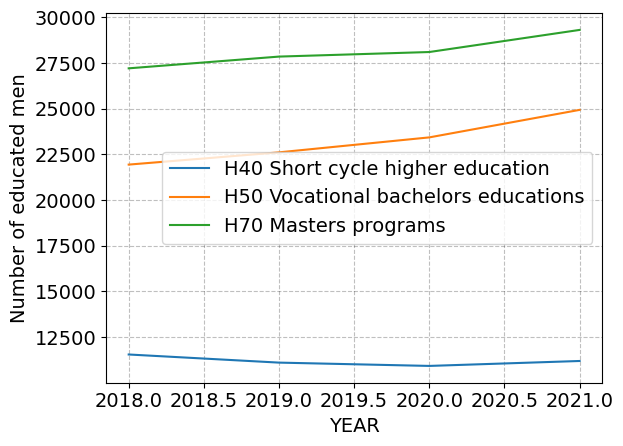

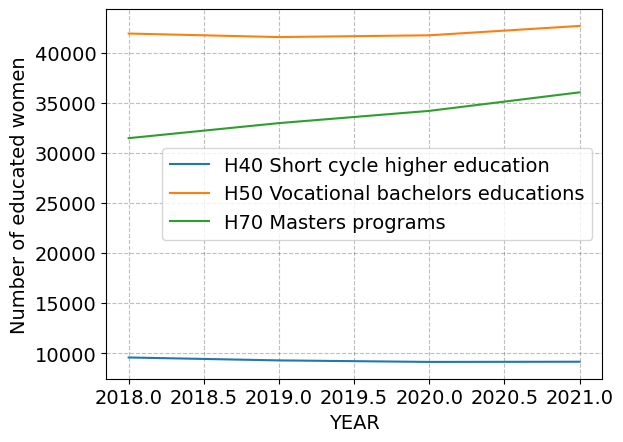

In [18]:
#We plot the number of educated men in the years from 2018 to 2021
educations = ['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in educations:
   I = (ind_tabel2_men["EDUCATION LEVEL"] == m)
   ind_tabel2_men.loc[I,:].plot(x='YEAR',y='EDUCATED',ax=ax,label=m)
   #ind_tabel2_men.xs(m).plot(x='YEAR',y='EDUCATED',ax=ax,label=m)

ax.legend(frameon=True, loc  = 7)
ax.set_ylabel('Number of educated men');

#We plot the number of educated women in the years from 2018 to 2021
educations2 = ['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in educations2:
   I = (ind_tabel2_women["EDUCATION LEVEL"] == m)
   ind_tabel2_women.loc[I,:].plot(x='YEAR',y='EDUCATED',ax=ax,label=m)
   #ind_tabel2_men.xs(m).plot(x='YEAR',y='EDUCATED',ax=ax,label=m)

ax.legend(frameon=True, loc  = 7)
ax.set_ylabel('Number of educated women');


The two plots illustrated above shows the number of men with a short cycle higher education, a vocational bachelors educations and a masters program the same for women from 2018 to 2021. It is clear from the two plots that more women tend to have a vocational bachelors education, whereas more men tend to have a short cycle education. The amount of men and women with a short cycle education for both men and women is roughly the same over the years, but when combining the educations a lot more women have finished an education than men. 

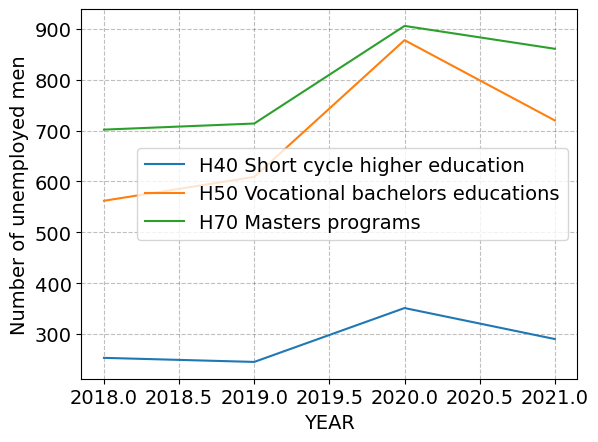

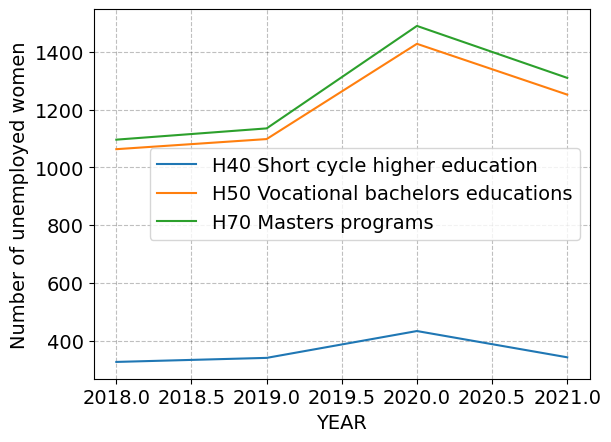

In [19]:
#We plot the number of unemployed with the three different educations men in the years from 2018 to 2021
unemployment = ['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in unemployment:
   I = (unemp_tabel2_men["EDUCATION LEVEL"] == m)
   unemp_tabel2_men.loc[I,:].plot(x='YEAR',y='UNEMPLOYED',ax=ax,label=m)
   #ind_tabel2_men.xs(m).plot(x='YEAR',y='EDUCATED',ax=ax,label=m)

ax.legend(frameon=True, loc  = 7)
ax.set_ylabel('Number of unemployed men');

#We plot the number of educated women in the years from 2018 to 2021
unemployment2 = ['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in unemployment2:
   I = (unemp_tabel2_women["EDUCATION LEVEL"] == m)
   unemp_tabel2_women.loc[I,:].plot(x='YEAR',y='UNEMPLOYED',ax=ax,label=m)
   #ind_tabel2_men.xs(m).plot(x='YEAR',y='EDUCATED',ax=ax,label=m)

ax.legend(frameon=True, loc  = 7)
ax.set_ylabel('Number of unemployed women');

The two plots above show how many are unemployed with either a short cycle education, a vocational bachelors education or a masters program. The first plot whows for men and the second for women. Even though as concluded before that more women have an education the rate of unemployment for women with either one of these eduactions is a bit higher than for men. Around 2020 the numbers of unemployed for both men and women with either one of the educations is rising, this could be due to corona, but this is decilining again towards 2021. 

In [20]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

In [21]:
#To combine the two datasats, we merge the number of unemployed to dataset IND. 
#The new data set, will then contain the both the number og unemployed and educated, for the three educational level on men and women
Merged_data = ind_tabel2.merge(unemp_tabel2, on=['EDUCATION LEVEL', 'SEX', 'YEAR'], how='left')
Merged_data #Illustate the new data

,EDUCATION LEVEL,SEX,YEAR,EDUCATED,STATUS,UNEMPLOYED
0,H40 Short cycle higher education,Women,2018,9573,Unemployed,326
1,H40 Short cycle higher education,Men,2018,11546,Unemployed,253
2,H50 Vocational bachelors educations,Women,2018,41903,Unemployed,1063
3,H50 Vocational bachelors educations,Men,2018,21943,Unemployed,562
4,H70 Masters programs,Women,2018,31463,Unemployed,1096
5,H70 Masters programs,Men,2018,27214,Unemployed,702
6,H40 Short cycle higher education,Women,2019,9281,Unemployed,340
7,H40 Short cycle higher education,Men,2019,11101,Unemployed,245
8,H50 Vocational bachelors educations,Women,2019,41552,Unemployed,1098
9,H50 Vocational bachelors educations,Men,2019,22614,Unemployed,609


Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [22]:
#To be able to make an interactive graph, the data is split into men and women.
#The merged data for men is made first
Merged_data_men = Merged_data[Merged_data["SEX"]=="Men"]
Merged_data_men #Illustrates the data for men

,EDUCATION LEVEL,SEX,YEAR,EDUCATED,STATUS,UNEMPLOYED
1,H40 Short cycle higher education,Men,2018,11546,Unemployed,253
3,H50 Vocational bachelors educations,Men,2018,21943,Unemployed,562
5,H70 Masters programs,Men,2018,27214,Unemployed,702
7,H40 Short cycle higher education,Men,2019,11101,Unemployed,245
9,H50 Vocational bachelors educations,Men,2019,22614,Unemployed,609
11,H70 Masters programs,Men,2019,27857,Unemployed,714
13,H40 Short cycle higher education,Men,2020,10920,Unemployed,351
15,H50 Vocational bachelors educations,Men,2020,23433,Unemployed,878
17,H70 Masters programs,Men,2020,28107,Unemployed,906
19,H40 Short cycle higher education,Men,2021,11190,Unemployed,290


In [23]:
#The interactive plots for men is made:
def _plot_timeseries(dataframe, variable): #making the timeseries graph
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    I = dataframe["EDUCATION LEVEL"] == variable #choseing the variable, that is the interactive element
    x = dataframe.loc[I,"YEAR"] 
    y = dataframe.loc[I,"UNEMPLOYED"]
    ax.plot(x,y)
    
def plot_timeseries(dataframe): #making the interactive element
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(Merged_data_men), #choosing the dataset, used in the grafh
    variable = widgets.Dropdown(
        description='EDUCATION LEVEL', #namine the interactive element
        options=['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs'], #Defining which value 
        #to choose form in the interactive element
        value='H40 Short cycle higher education'),  #defining what the model chooses as the first variable, when showing the graph           
);             


In [24]:
plot_timeseries(Merged_data_men)

interactive(children=(Dropdown(description='EDUCATION LEVEL', options=('H40 Short cycle higher education', 'H5…

The interactive plot shows that the unemployment for men overall has the same development regardless the education level. Because of the corona pandemic Denmark went through its first shutdown in the beginning of 2020. From all the three interactive plot it is showns that the unemployment icreased in 2020, because of the shutdown. The unemployment for men with short or midlle lenght education increased with around 40 pct. from 2019 to 2020. Where the unemployment for men with a long education increased with around 25 pct. from 2019 to 2020. People with long education often ends in more computerized jobs, which made it easy to work from home in the shutdown. Opposite a shorter education leads to more practical jobs. A lot of companies was forced to shutdown, which had a greater influence of the people with a short or a middle lenght education. 

In [25]:
#Data set for women is defined
Merged_data_women = Merged_data[Merged_data["SEX"]=="Women"]
Merged_data_women

,EDUCATION LEVEL,SEX,YEAR,EDUCATED,STATUS,UNEMPLOYED
0,H40 Short cycle higher education,Women,2018,9573,Unemployed,326
2,H50 Vocational bachelors educations,Women,2018,41903,Unemployed,1063
4,H70 Masters programs,Women,2018,31463,Unemployed,1096
6,H40 Short cycle higher education,Women,2019,9281,Unemployed,340
8,H50 Vocational bachelors educations,Women,2019,41552,Unemployed,1098
10,H70 Masters programs,Women,2019,32964,Unemployed,1135
12,H40 Short cycle higher education,Women,2020,9129,Unemployed,433
14,H50 Vocational bachelors educations,Women,2020,41729,Unemployed,1428
16,H70 Masters programs,Women,2020,34186,Unemployed,1490
18,H40 Short cycle higher education,Women,2021,9148,Unemployed,342


In [26]:
#The interactive plot for women is made the same way as for men. The only difference is the choosen data set
def _plot_timeseries(dataframe, variable):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)

    I = dataframe["EDUCATION LEVEL"] == variable
    x = dataframe.loc[I,"YEAR"]
    y = dataframe.loc[I,"UNEMPLOYED"]
    ax.plot(x,y)  
    
def plot_timeseries(dataframe):
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(Merged_data_women), #different for the interactive model for men, since the data set for women is choosen here.
    variable = widgets.Dropdown(
        description='EDUCATION LEVEL', 
        options=['H40 Short cycle higher education','H50 Vocational bachelors educations','H70 Masters programs'], 
        value='H40 Short cycle higher education'),              
); 

In [27]:
plot_timeseries(Merged_data_women)

interactive(children=(Dropdown(description='EDUCATION LEVEL', options=('H40 Short cycle higher education', 'H5…

The same development is shown for the women, where the unemployment is affected by the corona pandemic regrardless of education level. However it is shown from the interactive plots that the unemployment rate is greater the higher education level a woman has. The unemployment increased by around 29 pct. from 2019 to 2020 for women with long education. However the unemployment increased by around 21 pct. from 2019 to 2020 for women with short education. In general more women than men are public employed. A lot of the jobs which demands a shorter education and which is dominated by women are public, such as pedagogues, nurses or social workers. The private sector was probably faster to layoff people than the public sector, which explains this development. 

# Conclusion